<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6_3_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imshow 하는 함수

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
  n = len(arr)
  row = int(np.ceil(n//10))
  col = n if row < 2 else 10

  fig, axs = plt.subplots(row, col, figsize = (col, row), squeeze = False)

  for i in range(row):
    for j in range(col):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i * 10 + j])
      axs[i, j].axis('off')

  plt.show()

데이터 다운로드

In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-02-08 06:36:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-08 06:36:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-08 06:36:14--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

PCA - 주성분 분석

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print("PCA 결과 shape : ", pca.components_.shape)
print(pca.components_)

PCA 결과 shape :  (50, 10000)
[[-9.24490195e-06 -5.10601298e-06 -8.91640398e-06 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.69701611e-05  1.13551048e-05  1.82152559e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.65220463e-05 -2.08401738e-05 -2.89870127e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-6.64173119e-06  3.78351703e-05  1.30619771e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.47289621e-05  9.31995178e-05  1.28779402e-04 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 8.82303977e-05  1.22121028e-05  3.99290061e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


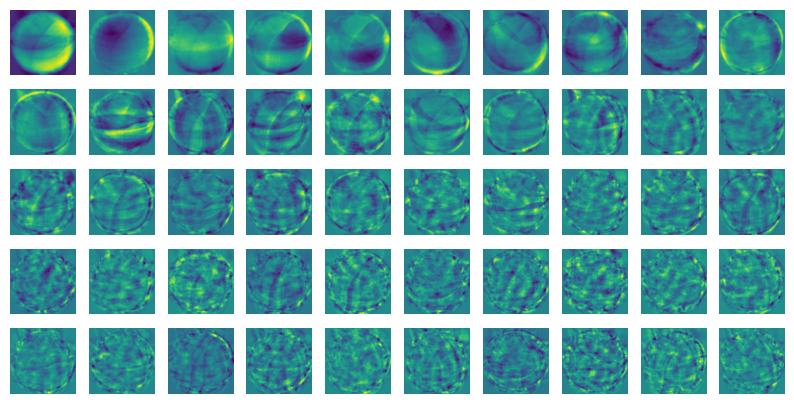

In [19]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [20]:
fruits_pca = pca.transform(fruits_2d)
print("fruits_pca shape : ", fruits_pca.shape)
print(fruits_pca)

fruits_pca shape :  (300, 50)
[[ 2778.41779458  1571.87380944 -1335.33773921 ...   -18.61031814
    -15.47967951    92.43920459]
 [ 3078.27365136  2739.2704099   -636.18337428 ...   116.40774472
    127.0916517     57.96162144]
 [ 2620.61072939  1486.87055254 -1471.33777746 ...    33.20792281
      8.58267919   103.40424255]
 ...
 [-5182.12868262  -121.76051591  2777.28502164 ...  -503.74070522
     84.13421939   -29.62680201]
 [-3987.98800619    70.88160742 -2925.55235284 ...   262.73363946
   -282.44453017   378.06485529]
 [-5823.86570617  1276.98866769   162.05805102 ...  -391.78093157
   -121.7592199   -449.02541615]]


원본 데이터 재구성

Text(0.5, 1.0, 'Original - Reconstruct Difference')

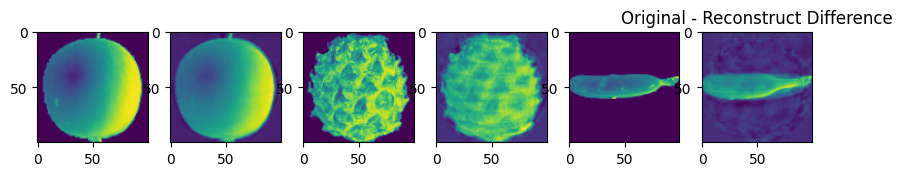

In [46]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

fig, axs = plt.subplots(1,6, figsize=(10,10))
axs[0].imshow(fruits[0])
axs[1].imshow(fruits_reconstruct[0])

axs[2].imshow(fruits[100])
axs[3].imshow(fruits_reconstruct[100])

axs[4].imshow(fruits[200])
axs[5].imshow(fruits_reconstruct[200])

plt.title('Original - Reconstruct Difference')

설명된 분산 - 잘 모르겠지만 다 더하면 이 PCA들이 얼마나 원본데이터를 표현하고 있는지에 대한 값인듯.

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645189 0.00578896 0.00511201
 0.0048638  0.00480346 0.00447837 0.00437319 0.00408031 0.0038947
 0.00372446 0.00359289 0.00331446 0.00317845 0.00304248 0.00303737
 0.00288867 0.00275868 0.00264941 0.00255855 0.00252044 0.00247274
 0.00239474 0.00230969 0.00222017 0.00216531 0.0021392  0.00196314
 0.00192913 0.00189108 0.00185255 0.00182094 0.00174002 0.00169522
 0.00162014 0.00160191]
==> 0.9215686490034519 만큼 데이터를 설명하고 있습니다


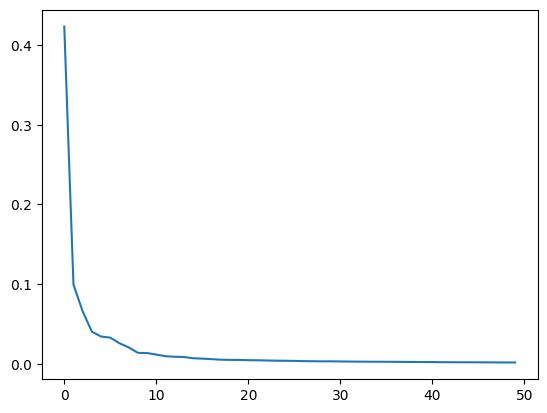

In [41]:
plt.plot(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)
print("==>", np.sum(pca.explained_variance_ratio_), "만큼 데이터를 설명하고 있습니다")

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

scores = cross_validate(lr, fruits_2d, target)
print(f"{np.mean(scores['test_score'])}")

0.9966666666666667
